# Testing dataset code for balancing frequencies

In [ ]:
import os
os.chdir('../WCSLS')
os.getcwd()

In [71]:
import matplotlib.pyplot as plt
from dataset import *

In [94]:
dataset = WineGridDataset(testing=False, analyzing=False, N_contexts='two', 
                          N_responses='one', use_images=True, 
                          image_dir='images/')

Get counts for each face in existing dataset

In [95]:
locs = [loc for loc in dataset.loc2idx.keys()]
train = dataset.grid.train

def get_counts(train):
    counts = {loc:[0,0] for loc in locs} # loc: [wins, losses]
    for f1, f2, cx, y1, y2  in train:
        if y1 == 0:
            winner = f2
            loser = f1
        else:
            winner = f1
            loser = f2
        counts[winner][0] += 1
        counts[loser][1] += 1
    return counts

In [96]:
def plot_counts(counts):
    fig, ax = plt.subplots()

    # Add lines of grid
    ax.hlines(y=[-0.5, 0.5, 1.5, 2.5, 3.5], xmin=-0.5, xmax=3.5)
    ax.vlines(x=[-0.5, 0.5, 1.5, 2.5, 3.5], ymin=-0.5, ymax=3.5)

    # Add annotations: Wins, Losses
    for loc, count in counts.items():
        ax.annotate("W: {}, L: {}".format(count[0], count[1]), (loc[0]-0.35, loc[1]))

    # Formatting
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

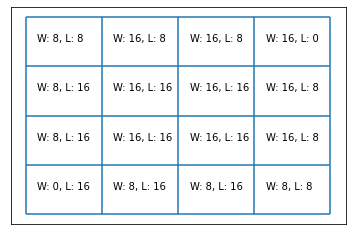

In [97]:
counts = get_counts(train)
plot_counts(counts)

Add proposed pairs to balance

In [98]:
# Extra wins
wins1 = [((0,0),(0,1),1,0,-1)] * 4 + [((0,1),(0,0),1,1,-1)] * 4
wins2 = [((0,0),(0,2),1,0,-1)] * 4 + [((0,2),(0,0),1,1,-1)] * 4
wins3 = [((0,0),(1,0),0,0,-1)] * 4 + [((1,0),(0,0),0,1,-1)] * 4
wins4 = [((0,0),(2,0),0,0,-1)] * 4 + [((2,0),(0,0),0,1,-1)] * 4
wins = wins1 + wins2 + wins3 + wins4

# Extra losses
losses1 = [((3,3),(3,2),1,1,-1)] * 4 + [((3,2),(3,3),1,0,-1)] * 4
losses2 = [((3,3),(3,1),1,1,-1)] * 4 + [((3,1),(3,3),1,0,-1)] * 4
losses3 = [((3,3),(2,3),0,1,-1)] * 4 + [((2,3),(3,3),0,0,-1)] * 4
losses4 = [((3,3),(1,3),0,1,-1)] * 4 + [((1,3),(3,3),0,0,-1)] * 4
losses = losses1 + losses2 + losses3 + losses4

# Extras
extra = wins + losses
train += extra

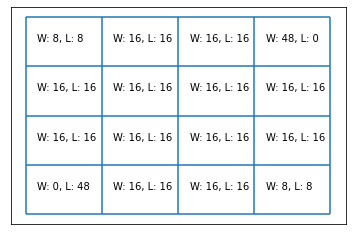

In [99]:
counts = get_counts(train)
plot_counts(counts)